# OpenCV introduction

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

path = "./starry_night.jpg"

In [3]:
print("The OpenCV version is:", cv2.__version__)

The OpenCV version is: 4.9.0


<class 'numpy.ndarray'>
(1014, 1280, 3)
uint8


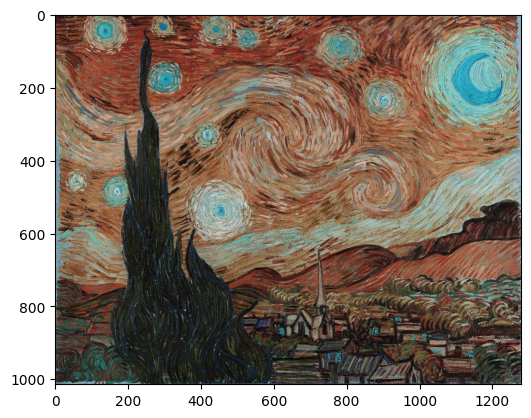

In [4]:
#Read an image
image = cv2.imread("starry_night.jpg")
print(type(image))
print(image.shape)
print(image.dtype)
plt.imshow(image)
plt.show()

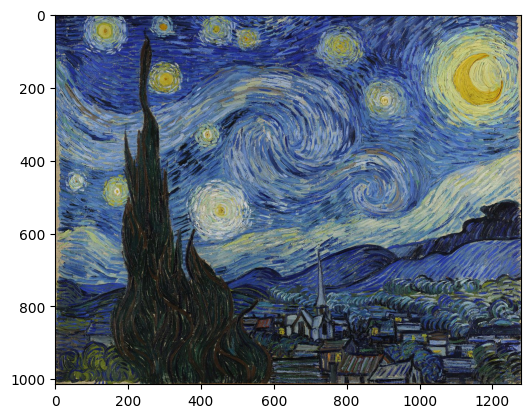

In [5]:
#Convert an image for visualization
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.show()

The pixel value is: [ 92 111 167]


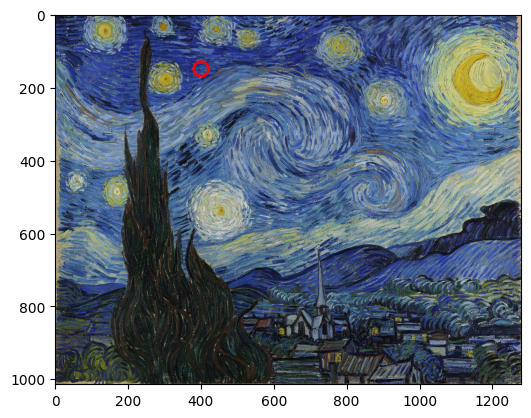

In [6]:
#Selecting a pixel
pixel = image_rgb[150,400]
print("The pixel value is:", pixel)
image_rgb_copy = np.copy(image_rgb)
cv2.circle(image_rgb_copy , (400,150), 20 ,[255, 0, 0], 5)
plt.imshow(image_rgb_copy)
plt.show()

The shape of this Grayscale Image is: (1014, 1280)
The pixel value is: 90


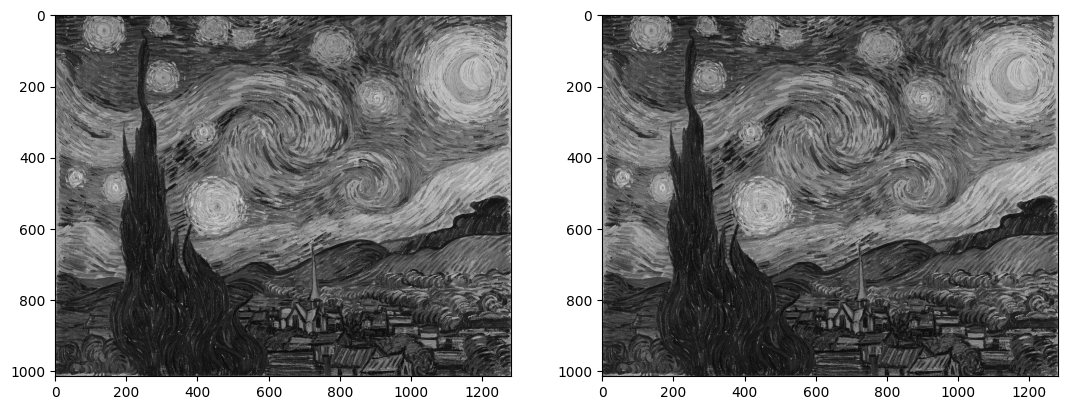

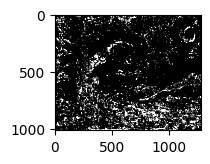

In [7]:
#Grayscale images
image_grayscale = cv2.imread("starry_night.jpg", cv2.IMREAD_GRAYSCALE)
print("The shape of this Grayscale Image is:", image_grayscale.shape)

plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(image_grayscale, cmap='gray', vmin=0, vmax=255)
print("The pixel value is:",image_grayscale[0,0])

image_color2grayscale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.subplot(1,3,2)
plt.imshow(image_color2grayscale, cmap='gray', vmin=0, vmax=255)
plt.show()

plt.subplot(1,3,3)
plt.imshow(np.abs(image_grayscale - image_color2grayscale), cmap='gray', vmin=0, vmax=10)
plt.show()

(1014, 1280) (1014, 1280) (1014, 1280)


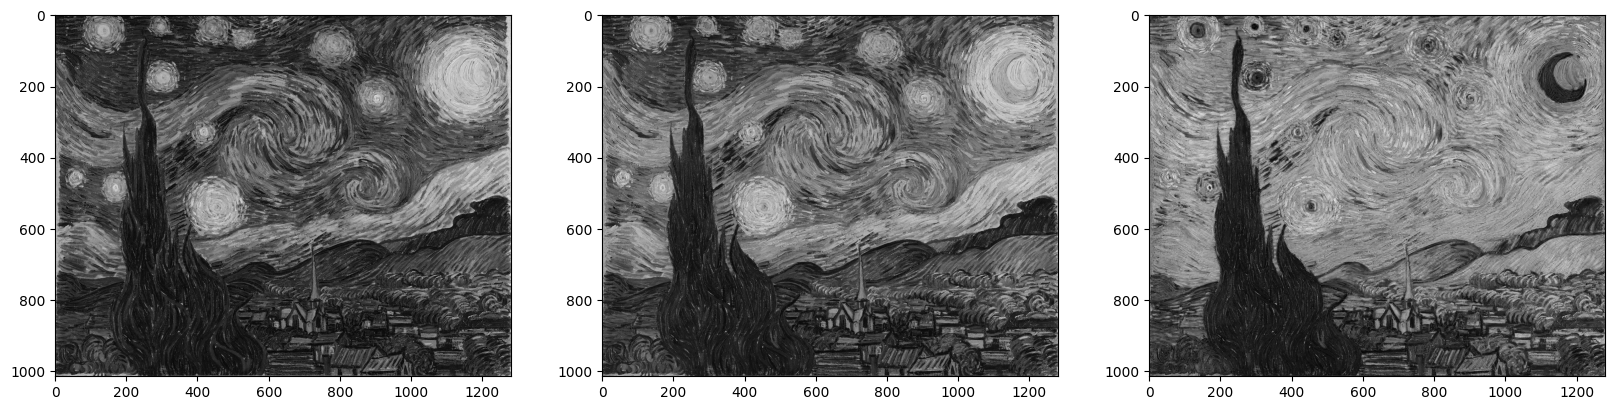

In [ ]:
#Channels in RGB images
R = image_rgb[:,:,0] # Getting the first axis, Red
G = image_rgb[:,:,1] # Getting the second axis, Green
B = image_rgb[:,:,2] # Getting the third axis, Blue

# Each channel can be seen as a grayscale image
print(R.shape, G.shape, B.shape)
plt.figure(figsize=(20, 10))
plt.subplot(1,3,1)
plt.imshow(R, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,2)
plt.imshow(G, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,3,3)
plt.imshow(B ,cmap='gray', vmin=0, vmax=255)
plt.show()

R, G and B shapes : (1014, 1280) (1014, 1280) (1014, 1280)
image_rgb shape :  (1014, 1280, 3)


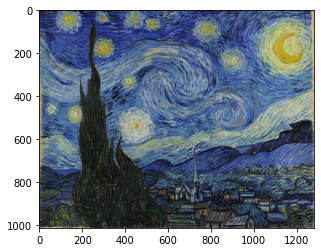

In [ ]:
#Re-combining channels
image_rgb = np.stack([R,G,B], axis=-1) # Axis specifies the position of the new axis. -1 means last position.
print('R, G and B shapes :', R.shape, G.shape, B.shape)
print('image_rgb shape : ', image_rgb.shape)
'
plt.imshow(image_rgb)
plt.show()

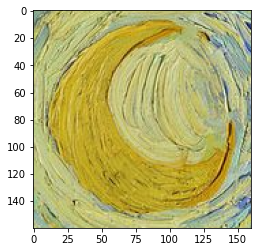

In [ ]:
#Region of Interest (RoI)
r=100
h=160
c=1080
w=160
moon = image_rgb[r:r+h,c:c+w,:]
plt.imshow(moon)
plt.show()

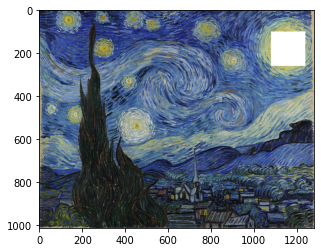

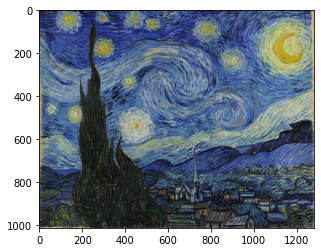

In [ ]:
#Removing RoI and adding it back
image_rgb_copy = image_rgb.copy()
center_row = r+(h//2)
center_column = c+(w//2)
radius = (h//2) # or "c"

image_rgb_copy[center_row - radius : center_row + radius, center_column - radius: center_column + radius, :] = 255
plt.imshow(image_rgb_copy)
plt.show()

image_rgb_copy[center_row - radius : center_row + radius, center_column - radius: center_column + radius] = image_rgb[r:r+h,c:c+w]
plt.imshow(image_rgb_copy)
plt.show()

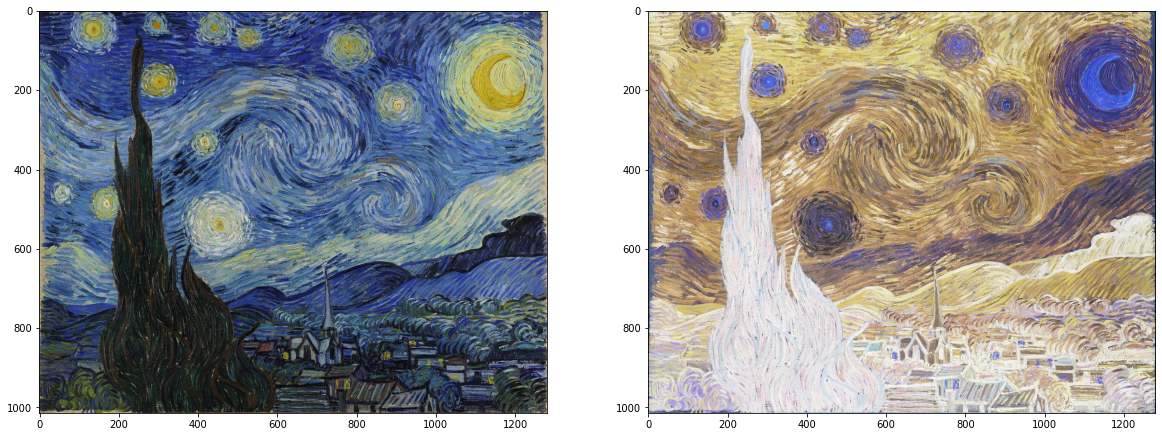

True

In [ ]:
# Invert image
image_rgb_inv = 255 - image_rgb.copy()

# Plotting the original and modified images
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(image_rgb)
plt.subplot(1,2,2)
plt.imshow(image_rgb_inv)
plt.show()

# Save image on disk
image_rgb_inv = image_rgb_inv[:,:,[2,1,0]].copy()
cv2.imwrite('starry_night_inv.jpg', image_rgb_inv)


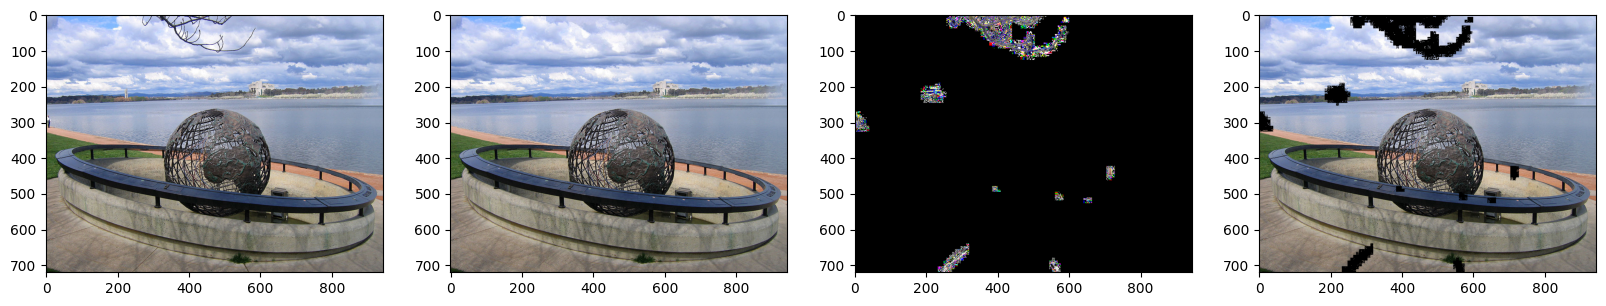

In [8]:
# Differences between images
image1 = cv2.imread('diff1.png')
image2 = cv2.imread('diff2.png')


# Perform Difference
abs_diff = np.abs(image1 - image2)

# Compute mean difference along last axis and mask image based on threshold
mean_rgb_diff = np.mean(abs_diff, axis=-1)
output_image = np.copy(image1)
output_image[mean_rgb_diff > 0] = 0

# Display Image
plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,2)
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,3)
plt.imshow(cv2.cvtColor(abs_diff, cv2.COLOR_BGR2RGB))
plt.subplot(1,4,4)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.show()


[[0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]
 [0.01234568 0.01234568 0.01234568 0.01234568 0.01234568 0.01234568
  0.01234568 0.01234568 0.01234568]]


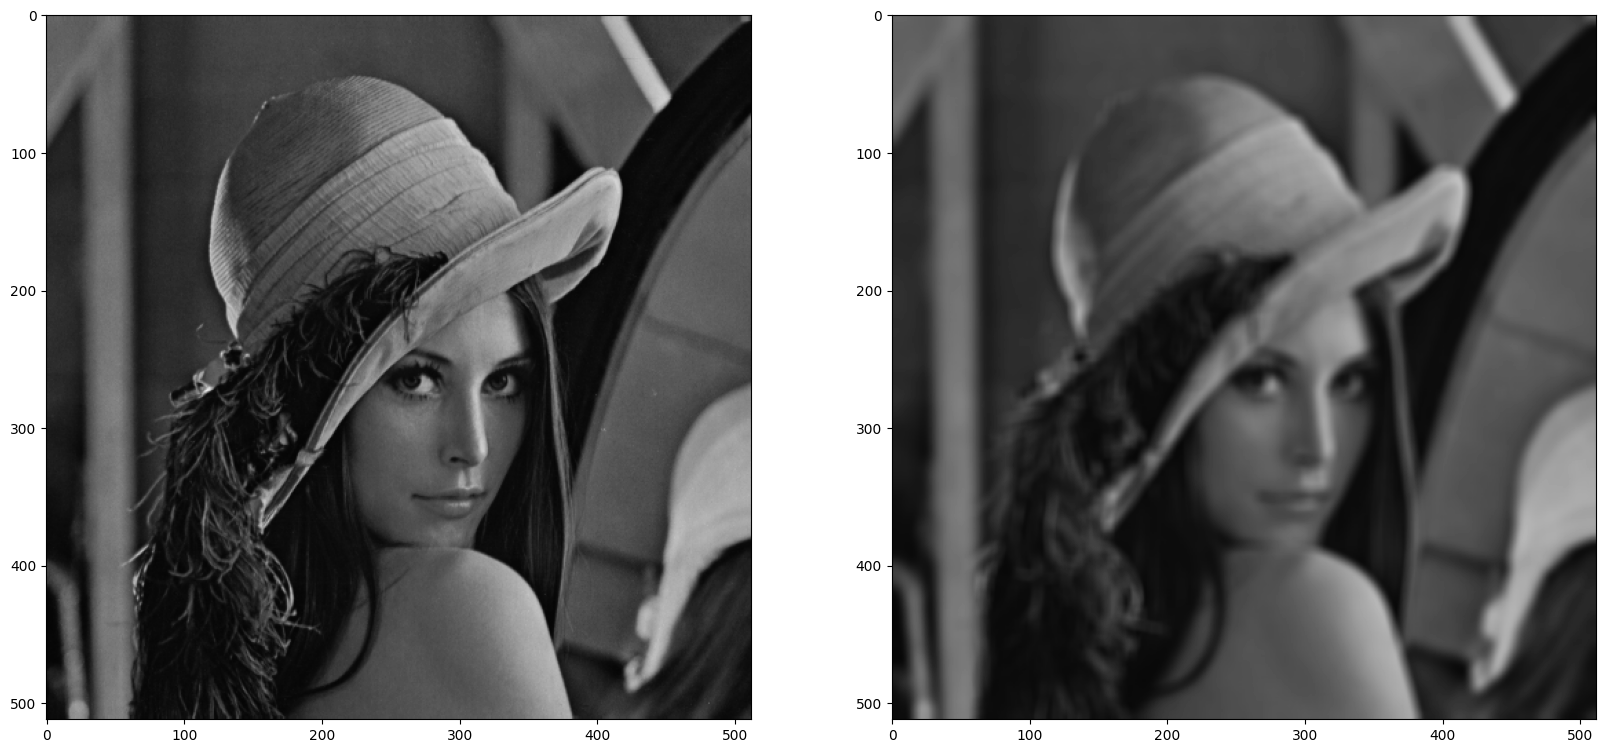

In [ ]:
# Spatial filtering: Convolutions and Correlations

import cv2
import numpy as np
from matplotlib import pyplot as plt

# Reading the image
plt.figure(figsize=(20,10))
img = cv2.imread("lenna.png", cv2.IMREAD_GRAYSCALE)
k_size = 9
mean_kernel = np.ones([k_size,k_size])/(k_size**2)
print(mean_kernel) # 1/81

# filter2D does correlation not convolution. In order to achieve the convolution we have to flip the kernel.
img_tr = cv2.filter2D(img,-1,mean_kernel)

plt.subplot(1,2,1)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.subplot(1,2,2)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

/home/max/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


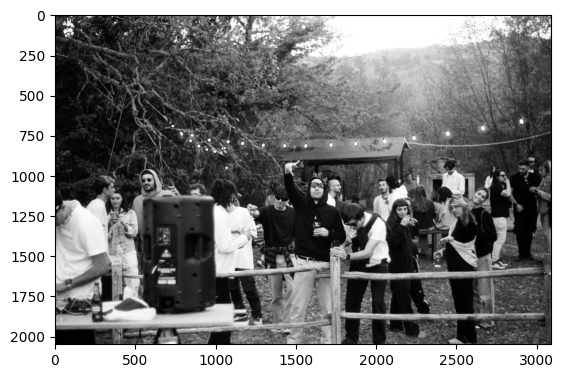

Sigma: 1.5, Kernel Size: 11
Time needed twice 1D:  0.09135031700134277


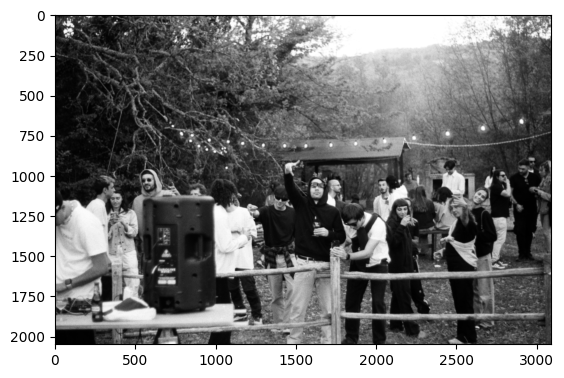

Time needed single 2D (SLOWER):  0.12807464599609375


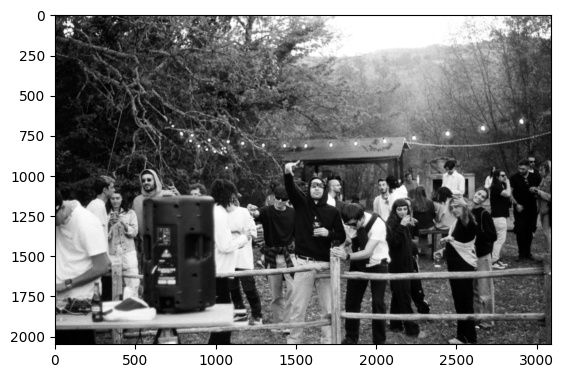

Time needed with OpenCV API (Best Optimization):  0.017963886260986328


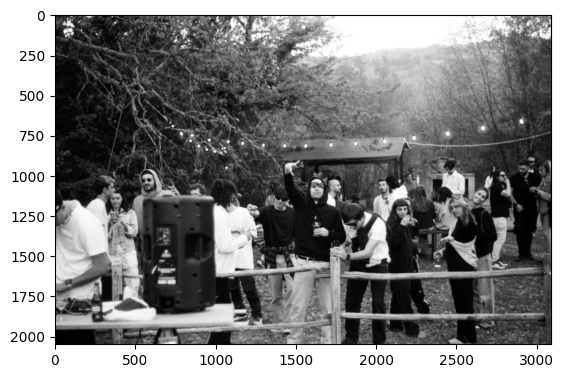

In [1]:
# Apply a 2D gaussian filter with sigma=1.5 to an image.
# Do it twice:
# - Finding the gaussian kernel and applying it (cv2.getGaussianKernel). First
#   by exploiting the gaussian separability and then with a 2D kernel.
# - Using the OpenCV function for gaussian blurring.
# Find the kernel size following the rule of thumb showed in the theory slides.

import cv2
import numpy as np
from matplotlib import pyplot as plt
import time # Library to compute timings

# Reading the image
img = cv2.imread("max.JPG", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

# Higher sigmas should correspond to larger kernels. usually big as
sigma = 1.5

# ceil does
k_size = int(np.ceil((3*sigma))*2 + 1) #rule of thumb for a good kernel size given sigma
print("Sigma: {}, Kernel Size: {}".format(sigma, k_size))


# Finding the gaussian kernel 1D 11x1
gaussian_kernel_1D = cv2.getGaussianKernel(k_size, sigma)
start = time.time()
img_tr1 = cv2.filter2D(img,-1,gaussian_kernel_1D)
img_tr = cv2.filter2D(img_tr1,-1,gaussian_kernel_1D.transpose())
print("Time needed twice 1D: ", time.time()-start)
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()


# Finding the gaussian kernel 2D 11x11
gaussian_kernel_2D = gaussian_kernel_1D.dot(gaussian_kernel_1D.transpose())
start = time.time()


# Applying the kernel
img_tr = cv2.filter2D(img,-1,gaussian_kernel_2D)
print("Time needed single 2D (SLOWER): ", time.time()-start)
# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()


# Using OpenCV function GaussianBlur
start = time.time()
img_tr = cv2.GaussianBlur(img, (k_size,k_size) , sigma)
print("Time needed with OpenCV API (Best Optimization): ", time.time()-start)
# Plot the result
plt.imshow(img_tr,cmap='gray',vmin=0,vmax=255)
plt.show()

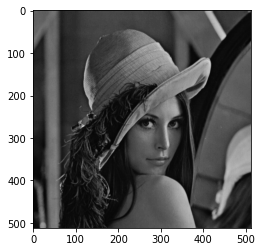

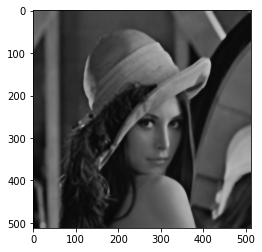

In [ ]:
# Reading the image
img = cv2.imread("lenna.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap='gray',vmin=0,vmax=255)
plt.show()

img_bilateral = cv2.bilateralFilter(img,9,75,75)

# Plot the result
plt.imshow(img_bilateral,cmap='gray',vmin=0,vmax=255)
plt.show()

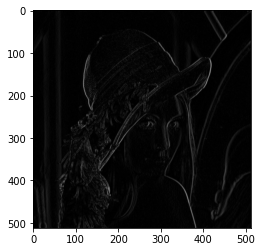

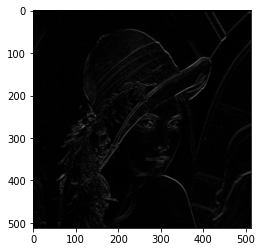

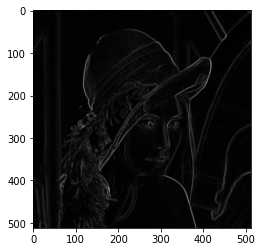

In [ ]:
# Edge detection: Sobel
img = cv2.imread("lenna.png",cv2.IMREAD_GRAYSCALE)

# Defining sobel kernels
sobel_kernel_x = np.array([
            [-1,0,1],
            [-2,0,2],
            [-1,0,1]])*1/4

sobel_kernel_y = np.array([
            [-1,-2,-1],
            [0,0,0],
            [1,2,1]])*1/4

# Finding dI(x, y)/dx
dx = cv2.filter2D(img.astype(float),-1,sobel_kernel_x)
dx = np.abs(dx)
plt.imshow(dx,cmap='gray',vmin=0,vmax=255)
plt.show()

# Finding dI(x, y)/dy
dy = cv2.filter2D(img.astype(float),-1,sobel_kernel_y)
dy = np.abs(dy)
plt.imshow(dy,cmap='gray',vmin=0,vmax=255)
plt.show()

# Finding gradient module pixel-wise
sobel = np.maximum(dx,dy)
plt.imshow(sobel,cmap='gray',vmin=0,vmax=255)
plt.show()

In [ ]:
# Edge detection: Canny

img = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)
edges = cv2.Canny(img,100,200)
plt.figure(figsize=(20,10))
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()